# Limpeza e Tratamento de Dados

Durante o processo de construção de um modelo temos diversas etapas como coleta de dados, pré-processamento, modelagem, avaliação e, finalmente, implantação de modelos. Destes o pré-processamento de dados é aquele com maior volume de trabalho e valor agregado. Se perguntarmos a um cientista de dados sobre seu processo de modelagem, ele dirá que é uma proporção de 60:40, o que significa que 60% do trabalho está relacionado ao pré-processamento e o resto com as técnicas de Machine Learning.
  
A limpeza de dados faz parte do pré-processamento e se caracteriza pela fixação ou remoção de dados incorretos, corrompidos, formatados incorretamente, duplicados ou incompletos dentro de um conjunto de dados. Ao combinar várias fontes de dados, há muitas oportunidades para que os dados sejam duplicados ou mal rotulados. Se os dados estiverem incorretos, os resultados e algoritmos não são confiáveis, mesmo que possam parecer corretos. Não há uma maneira absoluta de prescrever as etapas exatas do processo de limpeza de dados, pois os processos variam de conjunto de dados para conjunto de dados. 

## Dados Ausentes (Missing - NaN)
  
Os dados do tipo missing/ausente podem ser classificados em função do padrão
  
**1. Missing Completely at Random (MCAR)**  
Os dados são ditos do tipo MCAR quando “a probabilidade de estarem ausentes é independente de qualquer observação no dataset”. Essa abordagem assume que tanto os dados observados como os não observados são amostras aleatórias do mesmo mecanismo de geração de dados. Ou seja, não conseguimos encontrar uma correlação entre as classes que possuem dados ausentes e as classes que não possuem dados ausentes.
  
**2. Missing at Random (MAR)**  
A abordagem de dados do tipo MAR assume que as observações com dados faltantes não respeitam uma distribuição aleatória como as amostras com dados observados. Isso significa que precisamos modelar o comportamento das amostras com dados faltantes. Há uma relação sistemática entre os dados ausentes e alguma informação coletada sobre os dados
  
**3. Missing not at Random (MNAR)**  
Esse é o tipo mais geral e mais complexo. No modelo MNAR, a probabilidade é que os valores faltantes dependam não só dos dados observados assim como dos dados não observados. Não há como ignorar o mecanismo que levou os dados a estarem ausentes. Para esse tipo de dado, não podemos somente ignorar a situação, um tratamento precisa ser realizado.
  
fonte: https://ealexbarros.medium.com/principais-tipos-de-dados-faltantes-missing-em-um-dataset-49aa35cf18c8

In [2]:
import pandas as pd
import numpy as np

### Trabalhando com dados ausentes

Vamos ler a base **IT_Salary_Survey_EU_2020** que está na pasta dados, utilizando o método **pd.read_excel()**

In [3]:
df_salary = pd.read_excel(r"C:\Users\Sávio\Desktop\estudos_prog\ada\IT_salary_survey_EU_2020.xlsx")

In [4]:
df_salary.head()

,Age,Gender,City,Position,Years of experience,Seniority level,Main technology,Other technologies,Yearly salary,Vacation days,Employment status,Ð¡ontract duration,Language at work,Company size,Company type
0,26,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product
1,26,Male,Berlin,Backend Developer,7,Senior,Ruby,NaN,80000.0,28.0,Full-time employee,Unlimited contract,English,101-1000,Product
2,29,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,28,Male,Berlin,Frontend Developer,4,Junior,Javascript,NaN,54000.0,24.0,Full-time employee,Unlimited contract,English,51-100,Startup
4,37,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,29.0,Full-time employee,Unlimited contract,English,101-1000,Product


In [6]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1253 non-null   int64  
 1   Gender               1243 non-null   object 
 2   City                 1253 non-null   object 
 3   Position             1247 non-null   object 
 4   Years of experience  1253 non-null   int64  
 5   Seniority level      1241 non-null   object 
 6   Main technology      1126 non-null   object 
 7   Other technologies   1096 non-null   object 
 8   Yearly salary        1252 non-null   float64
 9   Vacation days        1252 non-null   float64
 10  Employment status    1235 non-null   object 
 11  Ð¡ontract duration   1223 non-null   object 
 12  Language at work     1236 non-null   object 
 13  Company size         1234 non-null   object 
 14  Company type         1227 non-null   object 
dtypes: float64(2), int64(2), object(11)
me

In [7]:
df_salary.isnull().sum()

Age                      0
Gender                  10
City                     0
Position                 6
Years of experience      0
Seniority level         12
Main technology        127
Other technologies     157
Yearly salary            1
Vacation days            1
Employment status       18
Ð¡ontract duration      30
Language at work        17
Company size            19
Company type            26
dtype: int64

In [8]:
df_salary.isna().sum()

Age                      0
Gender                  10
City                     0
Position                 6
Years of experience      0
Seniority level         12
Main technology        127
Other technologies     157
Yearly salary            1
Vacation days            1
Employment status       18
Ð¡ontract duration      30
Language at work        17
Company size            19
Company type            26
dtype: int64

In [9]:
#% do dataset com nan
(df_salary.isnull().sum() / df_salary.shape[0])*100

Age                     0.000000
Gender                  0.798085
City                    0.000000
Position                0.478851
Years of experience     0.000000
Seniority level         0.957702
Main technology        10.135674
Other technologies     12.529928
Yearly salary           0.079808
Vacation days           0.079808
Employment status       1.436552
Ð¡ontract duration      2.394254
Language at work        1.356744
Company size            1.516361
Company type            2.075020
dtype: float64

### Tratamento dos dados

1) Eliminando

In [11]:
df_salary.dropna(subset=['Gender', 'Yearly salary'])

,Age,Gender,City,Position,Years of experience,Seniority level,Main technology,Other technologies,Yearly salary,Vacation days,Employment status,Ð¡ontract duration,Language at work,Company size,Company type
0,26,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product
1,26,Male,Berlin,Backend Developer,7,Senior,Ruby,NaN,80000.0,28.0,Full-time employee,Unlimited contract,English,101-1000,Product
2,29,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,28,Male,Berlin,Frontend Developer,4,Junior,Javascript,NaN,54000.0,24.0,Full-time employee,Unlimited contract,English,51-100,Startup
4,37,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,29.0,Full-time employee,Unlimited contract,English,101-1000,Product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,34,Male,Zurich,Software Engineer,7,Senior,PHP,PHP,108500.0,25.0,Full-time employee,Unlimited contract,English,1950-11-01 00:00:00,Startup
1248,31,Male,Berlin,Backend Developer,9,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,26.0,Full-time employee,Unlimited contract,English,51-100,Product
1249,33,Male,Berlin,Researcher/ Consumer Insights Analyst,10,Senior,consumer analysis,NaN,60000.0,0.0,Full-time employee,Unlimited contract,English,1000+,Product
1250,39,Male,Munich,IT Operations Manager,15,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,28.0,Full-time employee,Unlimited contract,English,101-1000,eCommerce


2) Inserindo valores em seu lugar
  
a) Média

In [12]:
df_salary['Yearly salary'].fillna(df_salary['Yearly salary'].mean())

0       8.000000e+04
1       8.000000e+04
2       1.200000e+05
3       5.400000e+04
4       6.200000e+04
            ...     
1248    7.000000e+04
1249    6.000000e+04
1250    1.100000e+05
1251   -1.244314e+06
1252    6.500000e+04
Name: Yearly salary, Length: 1253, dtype: float64

b) Mediana

c) Moda (categóricas)

## Exploratory Data Analysis (EDA)

Conforme dicutimos na primeira aula, uma habilidade **MUITO** importante que cientistas de dados devem ter é a de **olha pros dados**, que quer dizer explorar os dados, ver do que eles se tratam, se habituar com eles.

Essa etapa é muitíssimo importante para que as etapas seguintes, em especial a de modelagem, funcionem adequadamente!

Dentro do jargão da área, essa etapa se chama **Exploratory Data Analysis** (**Análise Exploratória dos Dados**), ou simplesmente EDA. Quando dizemos "olhar pros dados", é a isso que nos referimos!

A etapa de EDA é muitíssimo importante, e deve tomar grande parte de um projeto de ciência de dados, como já discutimos, e ela comumente feita também com o auxílio de **gráficos** e outras ferramentas visuais. Faremos isso no próximo módulo, depois que aprendermos sobre ferramentas importantíssimas de **visualização de dados** (*dataviz*).

Por hora, faremos a EDA apenas utilizando o pandas, utilizando diversos métodos e funções específicas.

Lembre-se: o objetivo é que exploremos os dados o máximo possível! 

Então, essa é a etapa em que:

- Formulamos as perguntas importantes;
- E tentamos respondê-las com base nos dados!

Vamos lá?

### Dataset: Titanic

Agora exploraremos um pouco mais a fundo o dataset do <a href="https://www.kaggle.com/c/titanic">Titanic</a>.

Faremos a leitura da base, e também os primeiros passos da EDA, respondendo diversas perguntas muito interessantes.

Semana que vem, após aprendermos como fazer gráficos, avançaremos na EDA de forma visual!

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\Sávio\Desktop\estudos_prog\ada\titanic\train (1).csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Não vamos esquecer do nosso objetivo

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Bora praticar!**
  
Taxa de sobrevivência por:  
  
1) idade?  
2) faixa etária?  
3) sexo?  
4) classe?   
5) porto de embarque?  
6) preço medio por classe?  
7) fare?  


(Dos que sobreviveram:)

- qtos parentes tinham no navio?
- qtos da mesma família sobreviveram?

In [5]:
survived = df[df['Survived'] == 1]['Survived'].count()
population = df.Survived.count()

In [6]:
t_survived = survived / population
print(f'Taxa de sobrevivência geral: {t_survived*100:.2f}%')

Taxa de sobrevivência geral: 38.38%


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
df.Age = df.Age.fillna(0)

In [74]:
df.Age = df.Age.astype(int)

In [75]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.783389,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.597344,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


{'whiskers': [<matplotlib.lines.Line2D at 0x2c85f9f11d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c85f9f2c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c85f9f0490>],
 'medians': [<matplotlib.lines.Line2D at 0x2c85f9f8410>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c85f9f8f50>],
 'means': []}

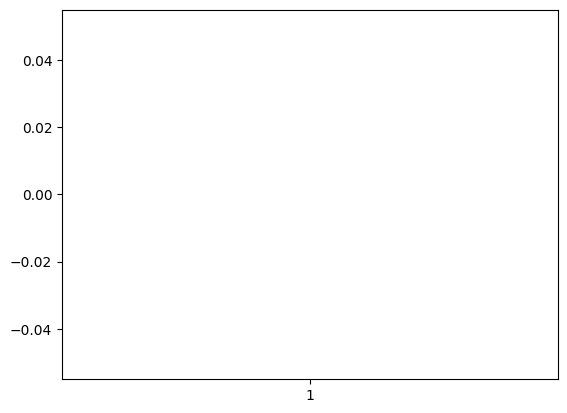

In [63]:
import matplotlib.pyplot as plt
plt.boxplot(df['Age'])

Existiam alguns valores nulos e outros valores menores que 0 na coluna de idade, para preservar as demais informações da linha, os Nan foram considerados como zero e os intervalos gerados serão >= 1


In [85]:
#gerando coluna faixa etária

limites_faixas = [1, 9, 19, 29, 39, 49, 59, 69,  100]

# Defina os rótulos para as faixas etárias (um a menos que o número de limites)
rotulos_faixas = ['1-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Crie a nova coluna 'faixa_etaria' usando pd.cut
df['faixa_etaria'] = pd.cut(df['Age'], bins=limites_faixas, labels=rotulos_faixas, right=False)


In [86]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,faixa_etaria
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,30-39


In [87]:
def taxa_sobrevivencia(df, variavel):
    survived = df['Survived'].sum()  
    population = df[variavel].count()
    
    t_survived = survived / population
    
    return print(f'Taxa de sobrevivência {variavel}: {t_survived*100:.2f}%')

taxa_sobrevivencia(df, 'Age')
taxa_sobrevivencia(df, 'Sex')
taxa_sobrevivencia(df, 'faixa_etaria')


Taxa de sobrevivência Age: 38.38%
Taxa de sobrevivência Sex: 38.38%
Taxa de sobrevivência faixa_etaria: 48.37%


**Qual a taxa de sobrevivência entre os gêneros (homens e mulheres) e classe do navio?**

In [26]:
df_survived = df[df['Survived'] == 1]
df_survived['Sex'].value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

In [27]:
male_surv = (df_survived[df_survived['Sex'] =='male'].Sex.count() / population) * 100
female_surv = (df_survived[df_survived['Sex'] =='female'].Sex.count() / population) * 100

print(f'Taxad de sobrevivência dos homens: {male_surv:.2f}%')
print(f'Taxad de sobrevivência dos homens: {female_surv:.2f}%')

Taxad de sobrevivência dos homens: 12.23%
Taxad de sobrevivência dos homens: 26.15%


In [45]:
pclass = df_survived['Pclass'].value_counts().reset_index()
taxa_pclass = (pclass['count'] / population) * 100
taxa_pclass = taxa_pclass.reset_index()
taxa_pclass

,index,count
0,0,15.263749
1,1,13.355780
2,2,9.764310


In [54]:
result = [f'taxa de sobrevivencia {i:.2f}%' for i in taxa_pclass['count']]
result


['taxa de sobrevivencia 15.26%',
 'taxa de sobrevivencia 13.36%',
 'taxa de sobrevivencia 9.76%']

**O local de embarque também afeta a taxa de sobrevivência? E há relação com a classe?**

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           891 non-null    int32   
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    object  
 11  Embarked      889 non-null    object  
 12  faixa_etaria  707 non-null    category
dtypes: category(1), float64(1), int32(1), int64(5), object(5)
memory usage: 81.4+ KB
